          area  bedrooms  bathrooms  age          price
0  4649.014246         2          1    8  826203.122376
1  1458.520710         2          3    3  318495.066094
2  1694.306561         1          1   26  204697.589725
3  1956.908957         4          1   21  363757.046426
4  1429.753988         1          2   16  205713.489581

Linear Regression (Raw Features)
R² Score: 0.7294
MSE: 3784988945.95
Coefficients:
  area: 152.77
  bedrooms: 50987.08
  bathrooms: 26858.39
  age: -1350.78


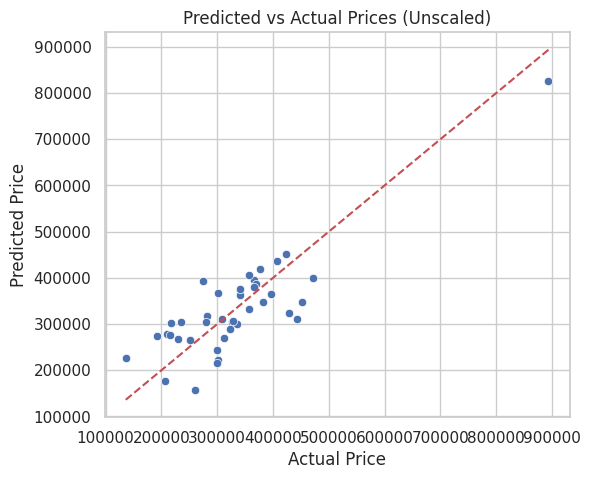


Linear Regression (Scaled Features)
R² Score: 0.7294
MSE: 3784988945.95
Coefficients:
  area: 116661.79
  bedrooms: 57832.11
  bathrooms: 22465.70
  age: -12065.41


<Figure size 800x500 with 0 Axes>

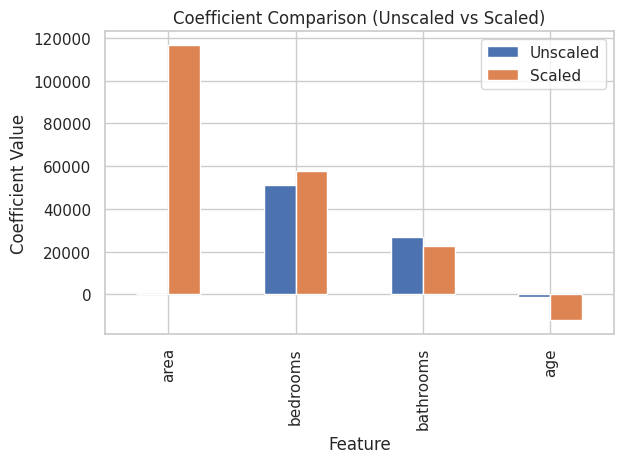

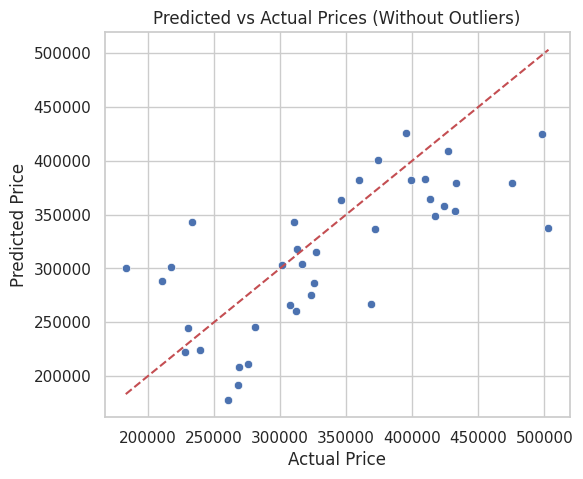


R² Score Without Outliers: 0.4295

Concluding Remarks:
- Linear regression captures strong linear trends but is sensitive to outliers.
- Feature scaling improves interpretability of coefficients but not model accuracy here.
- Removing outliers increased R², highlighting their negative influence.
- Consider robust regression or regularization in future to handle extreme values.


In [1]:
# =============================================================================
# Lab 12: Linear Regression – Housing Price Prediction
# =============================================================================

# Aim:
# To train a linear regression model to predict housing prices using features like
# area and number of bedrooms, and analyze the effects of outliers and scaling.

# Objective:
# 1. Train a Linear Regression model on housing data.
# 2. Evaluate predictions and interpret coefficients.
# 3. Explore the impact of feature scaling.
# 4. Observe how outliers affect model performance.

# =============================================================================
# Libraries
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style='whitegrid')
%matplotlib inline

# =============================================================================
# Synthetic Housing Dataset
# =============================================================================

np.random.seed(42)
n = 200

area = np.random.normal(1500, 300, n)         # in sq ft
bedrooms = np.random.randint(1, 5, n)         # 1 to 4 bedrooms
bathrooms = np.random.randint(1, 4, n)
age = np.random.randint(0, 30, n)             # years old

# Linear function + noise
price = (
    100 * area +
    50000 * bedrooms +
    30000 * bathrooms -
    1000 * age +
    np.random.normal(0, 50000, n)
)

# Add outliers
area[::20] += 3000
price[::20] += 500000

df = pd.DataFrame({
    'area': area,
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'age': age,
    'price': price
})

print(df.head())

# =============================================================================
# Feature & Target Split
# =============================================================================

X = df[['area', 'bedrooms', 'bathrooms', 'age']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =============================================================================
# Linear Regression (Raw Features)
# =============================================================================

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
mse_raw = mean_squared_error(y_test, y_pred)
r2_raw = r2_score(y_test, y_pred)

print("\nLinear Regression (Raw Features)")
print(f"R² Score: {r2_raw:.4f}")
print(f"MSE: {mse_raw:.2f}")
print("Coefficients:")
for name, coef in zip(X.columns, lr.coef_):
    print(f"  {name}: {coef:.2f}")

# Prediction Plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Prices (Unscaled)")
plt.grid(True)
plt.show()

# =============================================================================
# Feature Scaling
# =============================================================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print("\nLinear Regression (Scaled Features)")
print(f"R² Score: {r2_scaled:.4f}")
print(f"MSE: {mse_scaled:.2f}")
print("Coefficients:")
for name, coef in zip(X.columns, lr_scaled.coef_):
    print(f"  {name}: {coef:.2f}")

# Coefficient comparison
plt.figure(figsize=(8, 5))
coefs_df = pd.DataFrame({
    'Feature': X.columns,
    'Unscaled': lr.coef_,
    'Scaled': lr_scaled.coef_
})
coefs_df.set_index('Feature').plot(kind='bar', title="Coefficient Comparison (Unscaled vs Scaled)")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

# =============================================================================
# Outlier Impact Analysis
# =============================================================================

df_clean = df[(df['area'] < 3000) & (df['price'] < 800000)]

X_clean = df_clean[['area', 'bedrooms', 'bathrooms', 'age']]
y_clean = df_clean['price']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

lr_clean = LinearRegression()
lr_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = lr_clean.predict(X_test_clean)

r2_clean = r2_score(y_test_clean, y_pred_clean)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test_clean, y=y_pred_clean)
plt.plot([y_test_clean.min(), y_test_clean.max()],
         [y_test_clean.min(), y_test_clean.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Prices (Without Outliers)")
plt.grid(True)
plt.show()

print("\nR² Score Without Outliers: {:.4f}".format(r2_clean))

# =============================================================================
# Concluding Remarks
# =============================================================================

print("\nConcluding Remarks:")
print("- Linear regression captures strong linear trends but is sensitive to outliers.")
print("- Feature scaling improves interpretability of coefficients but not model accuracy here.")
print("- Removing outliers increased R², highlighting their negative influence.")
print("- Consider robust regression or regularization in future to handle extreme values.")
